**Import Libaries and Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
%matplotlib inline

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Melbourne_housing_FULL.csv to Melbourne_housing_FULL.csv


**Observing Data**

In [3]:
df=pd.read_csv('Melbourne_housing_FULL.csv')
df.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0


In [4]:
print(f'Shape     : {df.shape}\n'
      f'Size      : {df.size}\n'
      f'Dimension : {df.ndim}')

Shape     : (34857, 21)
Size      : 731997
Dimension : 2


In [5]:
#Select Numerical and categorical features
kategorik_sutunlar = df.select_dtypes(include=['object', 'category']).columns
numerik_sutunlar = df.select_dtypes(include=['int64', 'float64']).columns
print(f'numerik_sutunlar- {numerik_sutunlar}\n'
      f'kategorik_sutunlar- {kategorik_sutunlar}')

numerik_sutunlar- Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')
kategorik_sutunlar- Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [7]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [8]:
df.duplicated().sum()

1

In [9]:
df.loc[df.duplicated(keep=False), :]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [10]:
#Clear Duplicate Data
df = df.drop_duplicates()
df .duplicated().sum()

0

In [11]:
#Detect outliers and replace outlier values
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

z_score_threshold = 3

for col in numerical_columns:
    z_scores = (df[col] - df[col].mean())/df[col].std()
    outliers = (z_scores < -z_score_threshold) | (z_scores > z_score_threshold)
    print("Outlier counts of column:", col, df[col][outliers].count())
    df[col][outliers] = np.nan # replace with nan

Outlier counts of column: Rooms 269
Outlier counts of column: Price 474
Outlier counts of column: Distance 792
Outlier counts of column: Postcode 558
Outlier counts of column: Bedroom2 73
Outlier counts of column: Bathroom 371
Outlier counts of column: Car 353
Outlier counts of column: Landsize 43
Outlier counts of column: BuildingArea 9
Outlier counts of column: YearBuilt 9
Outlier counts of column: Lattitude 324
Outlier counts of column: Longtitude 315
Outlier counts of column: Propertycount 844


<ipython-input-11-633505243ef1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][outliers] = np.nan # replace with nan
<ipython-input-11-633505243ef1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][outliers] = np.nan # replace with nan
<ipython-input-11-633505243ef1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][outliers] = np.nan # replace with nan
<ipython-input-11-633505243ef1>:10: SettingWithCopyWarn

In [12]:
df.corr()

<ipython-input-12-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.468995,0.300691,0.047334,0.972497,0.589567,0.415468,0.194675,0.620396,-0.015961,0.011280,0.120249,-0.062682
Price,0.468995,1.000000,-0.183713,0.188211,0.434747,0.361647,0.192249,0.103414,0.452130,-0.376396,-0.272323,0.208586,-0.025097
Distance,0.300691,-0.183713,1.000000,0.213541,0.300787,0.151293,0.269077,0.158216,0.157348,0.347225,-0.028705,0.332345,-0.105943
Postcode,0.047334,0.188211,0.213541,1.000000,0.058054,0.111601,0.059963,0.057447,0.082982,-0.026739,-0.465576,0.495008,0.084654
Bedroom2,0.972497,0.434747,0.300787,0.058054,1.000000,0.592526,0.417653,0.201433,0.615851,-0.005236,0.009905,0.125947,-0.039309
Bathroom,0.589567,0.361647,0.151293,0.111601,0.592526,1.000000,0.315730,0.108611,0.546008,0.177112,-0.058775,0.104761,-0.011172
Car,0.415468,0.192249,0.269077,0.059963,0.417653,0.315730,1.000000,0.196386,0.349631,0.152274,-0.012896,0.084759,-0.025989
Landsize,0.194675,0.103414,0.158216,0.057447,0.201433,0.108611,0.196386,1.000000,0.183655,0.033776,0.006864,0.108251,-0.023956
BuildingArea,0.620396,0.452130,0.157348,0.082982,0.615851,0.546008,0.349631,0.183655,1.000000,0.073768,-0.051515,0.108889,-0.029461
YearBuilt,-0.015961,-0.376396,0.347225,-0.026739,-0.005236,0.177112,0.152274,0.033776,0.073768,1.000000,0.107364,-0.006853,0.010037


Rooms - 0.465238: The "Rooms" feature exhibits a positive correlation with "Price." This suggests that, as the number of rooms increases, home prices tend to rise. More rooms often indicate a larger and more expensive property.

Distance - (-0.211384): The "Distance" feature shows a negative correlation with "Price." This implies an inverse relationship between the distance of homes from the city center and their prices. Prices tend to decrease as the distance from the city center increases.

Bedroom2 - 0.430275: The "Bedroom2" feature has a positive correlation with "Price." An increase in the number of bedrooms is typically associated with higher home prices.

Bathroom - 0.429878: The "Bathroom" feature is positively correlated with "Price." More bathrooms often lead to higher home prices.

Car - 0.201803: The "Car" feature exhibits a positive correlation with "Price," albeit weaker than the others. Homes with a greater car capacity tend to be associated with higher prices.

BuildingArea - 0.100754: The "BuildingArea" feature has a positive correlation with "Price." An increase in the size of the building area is likely to contribute to higher home prices.

YearBuilt - (-0.333306): The "YearBuilt" feature shows a negative correlation with "Price." This indicates that older homes are generally sold at lower prices.

Lattitude - (-0.215607): The "Lattitude" feature exhibits a negative correlation with "Price." There is an inverse relationship between latitude and prices.

Longtitude - 0.197874: The "Longtitude" feature has a positive correlation with "Price." There is a positive relationship between longitude and prices.

Propertycount - (-0.059017): The "Propertycount" feature shows a negative correlation with "Price," although this correlation is weaker than the others. A higher property count is typically associated with lower prices.

These correlations provide insights into the relationships between each feature and the property prices. Positive correlations suggest that an increase in the feature is associated with higher prices, while negative correlations indicate an inverse relationship. Correlations play a crucial role in determining which features to consider during data analysis and modeling.

In [13]:
# Remove features that has a very weak correlation with price, address is not necessary
df.drop(columns=["Postcode", "Landsize", "BuildingArea","Lattitude", "Longtitude", "Propertycount"], inplace=True)

<ipython-input-13-e591e497c312>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["Postcode", "Landsize", "BuildingArea","Lattitude", "Longtitude", "Propertycount"], inplace=True)


In [14]:
df[["Rooms", "Type","Bedroom2"]].groupby(["Type","Rooms"]).agg(pd.Series.mode)

Bedroom2
Type Rooms          
h    1.0         1.0
     2.0         2.0
     3.0         3.0
     4.0         4.0
     5.0         5.0
t    1.0         1.0
     2.0         2.0
     3.0         3.0
     4.0         4.0
     5.0         5.0
u    1.0         1.0
     2.0         2.0
     3.0         3.0
     4.0         4.0
     5.0         5.0

In [15]:
# Replace missing room values with Bedroom2 if any.
missing_room_idx=df.loc[df["Rooms"].isna()]["Rooms"].index.tolist()

for i in missing_room_idx:
    df.loc[i, "Rooms"] = df._get_value(i, "Bedroom2")

In [16]:
# Delete the remaining rows with missing room and drop Bedroom2
df.dropna(axis=0, subset="Rooms", inplace=True)
df.drop(columns=["Bedroom2"], inplace=True)

In [17]:
df.isna().sum()

Suburb             0
Address            0
Rooms              0
Type               0
Price           8048
Method             0
SellerG            0
Date               0
Distance         789
Bathroom        8540
Car             9037
YearBuilt      19254
CouncilArea        3
Regionname         3
dtype: int64

In [18]:
# Check missing Regionname rows.
df[df["Regionname"].isna()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Bathroom,Car,YearBuilt,CouncilArea,Regionname
18523,Footscray,2/16 Stafford St,2.0,u,710000.0,S,Jas,15/07/2017,5.1,NaN,NaN,NaN,NaN,NaN
26888,Camberwell,2/3 Kingsley St,2.0,h,825000.0,VB,Jellis,11/11/2017,7.7,NaN,NaN,NaN,NaN,NaN
29483,Fawkner Lot,1/3 Brian St,3.0,h,616000.0,SP,Brad,6/01/2018,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Replace missing Regionname with value that is in same Suburb or same Address
df.loc[18523 ,"Regionname"] = df["Regionname"].mode()[0]
df.loc[26888 ,"Regionname"] = df["Regionname"].mode()[0]
df.loc[29483 ,"Regionname"] = df["Regionname"].mode()[0]

In [20]:
df[df["CouncilArea"].isna()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Bathroom,Car,YearBuilt,CouncilArea,Regionname
18523,Footscray,2/16 Stafford St,2.0,u,710000.0,S,Jas,15/07/2017,5.1,NaN,NaN,NaN,NaN,Southern Metropolitan
26888,Camberwell,2/3 Kingsley St,2.0,h,825000.0,VB,Jellis,11/11/2017,7.7,NaN,NaN,NaN,NaN,Southern Metropolitan
29483,Fawkner Lot,1/3 Brian St,3.0,h,616000.0,SP,Brad,6/01/2018,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan


In [21]:
# Replace missing CouncilArea with the most common value that is in same suburb
df.loc[18523 ,"CouncilArea"] = df["CouncilArea"].mode()[0]
df.loc[26888 ,"CouncilArea"] = df["CouncilArea"].mode()[0]
df.loc[29483 ,"CouncilArea"] = df["CouncilArea"].mode()[0]

In [22]:
# Find max distance of houses by grouping YearBuilt.
grouped_yearBuilt_by_distance=df[["Distance", "YearBuilt"]].groupby("YearBuilt").max()

# Since distance and yearbuilt have a strong correlation with each other than the others,
# we can replace missing null distance values with checking same yearbuilt.
for k1, v1 in df[df["Distance"].isna()][["Distance", "YearBuilt"]].iterrows():
    for year, val in grouped_yearBuilt_by_distance.iterrows():
        if(v1["YearBuilt"] == year):
            df.at[k1, "Distance"] = val["Distance"]

In [23]:
# Remove all rows that has missing val in Distance
# Yearbuilt has a lot of missing values so it will be discarded
# Address is not necessary because of suburb and regionname features
# Date is not necessary
df.dropna(axis=0, subset="Distance", inplace=True)
df.drop(["Address", "YearBuilt", "Date"],axis=1,inplace=True)

In [24]:
# Find mean price of houses by grouping Rooms and Regionname
grouped_price=df[["Price", "Rooms", "Regionname"]].groupby(["Rooms", "Regionname"]).agg("mean")

# Replace missing null price with others in same regionname and same room numbers
for k1, v1 in df[df["Price"].isna()].iterrows():
    for k2, v2 in grouped_price.iterrows():
        if(v1["Rooms"] == k2[0] and v1["Regionname"] == k2[1]):
            df.at[k1, "Price"] = v2["Price"]

In [25]:
# Fill the missing values of Bathroom and Car with mode
df['Bathroom'].fillna(df['Bathroom'].mode()[0], inplace=True)
df['Car'].fillna(df['Car'].mode()[0], inplace=True)

In [26]:
# Check remaining missing values
df.isna().sum()

Suburb         0
Rooms          0
Type           0
Price          2
Method         0
SellerG        0
Distance       0
Bathroom       0
Car            0
CouncilArea    0
Regionname     0
dtype: int64

In [27]:
# Drop missing all rows in Price
df.dropna(axis=0, subset="Price", inplace=True)

In [28]:
df.corrwith(other=df["Price"], numeric_only=True)

Rooms       0.542496
Price       1.000000
Distance   -0.176694
Bathroom    0.355317
Car         0.176983
dtype: float64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34378 entries, 0 to 34856
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Suburb       34378 non-null  object 
 1   Rooms        34378 non-null  float64
 2   Type         34378 non-null  object 
 3   Price        34378 non-null  float64
 4   Method       34378 non-null  object 
 5   SellerG      34378 non-null  object 
 6   Distance     34378 non-null  float64
 7   Bathroom     34378 non-null  float64
 8   Car          34378 non-null  float64
 9   CouncilArea  34378 non-null  object 
 10  Regionname   34378 non-null  object 
dtypes: float64(5), object(6)
memory usage: 3.1+ MB


<ipython-input-30-ab1feb131af1>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,cmap=cmap)


<Axes: >

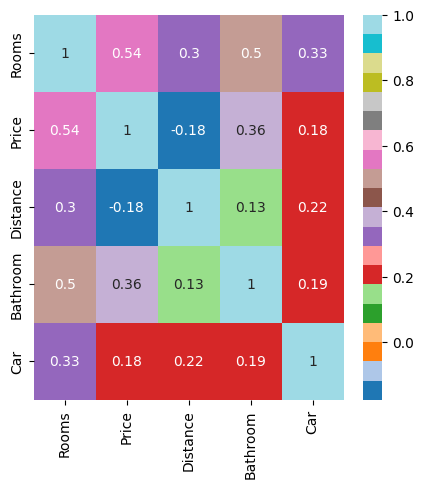

In [30]:
fig, ax = plt.subplots(figsize=(5, 5))
cmap = "tab20"
center = 0
sns.heatmap(df.corr(), annot=True,cmap=cmap)

In [31]:
label_encoder = LabelEncoder()
df['Renk_Suburb']=label_encoder.fit_transform(df['Suburb'])
df['Renk_Type']=label_encoder.fit_transform(df['Type'])
df['Renk_Method']=label_encoder.fit_transform(df['Method'])
df['Renk_SellerG']=label_encoder.fit_transform(df['SellerG'])
df['Renk_CouncilArea']=label_encoder.fit_transform(df['CouncilArea'])
df['Renk_Regionname']=label_encoder.fit_transform(df['Regionname'])
df.head(3)

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bathroom,Car,CouncilArea,Regionname,Renk_Suburb,Renk_Type,Renk_Method,Renk_SellerG,Renk_CouncilArea,Renk_Regionname
0,Abbotsford,2.0,h,7.416325e+05,SS,Jellis,2.5,1.0,1.0,Yarra City Council,Northern Metropolitan,0,0,6,151,31,2
1,Abbotsford,2.0,h,1.480000e+06,S,Biggin,2.5,1.0,1.0,Yarra City Council,Northern Metropolitan,0,0,2,32,31,2
2,Abbotsford,2.0,h,1.035000e+06,S,Biggin,2.5,1.0,0.0,Yarra City Council,Northern Metropolitan,0,0,2,32,31,2


In [32]:
kategorik_sutunlar = df.select_dtypes(include=['object', 'category']).columns
numerik_sutunlar = df.select_dtypes(include=['int64', 'float64']).columns
print(f'numerik_sutunlar- {numerik_sutunlar}\n'
      f'kategorik_sutunlar- {kategorik_sutunlar}')

numerik_sutunlar- Index(['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Renk_Suburb',
       'Renk_Type', 'Renk_Method', 'Renk_SellerG', 'Renk_CouncilArea',
       'Renk_Regionname'],
      dtype='object')
kategorik_sutunlar- Index(['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname'], dtype='object')


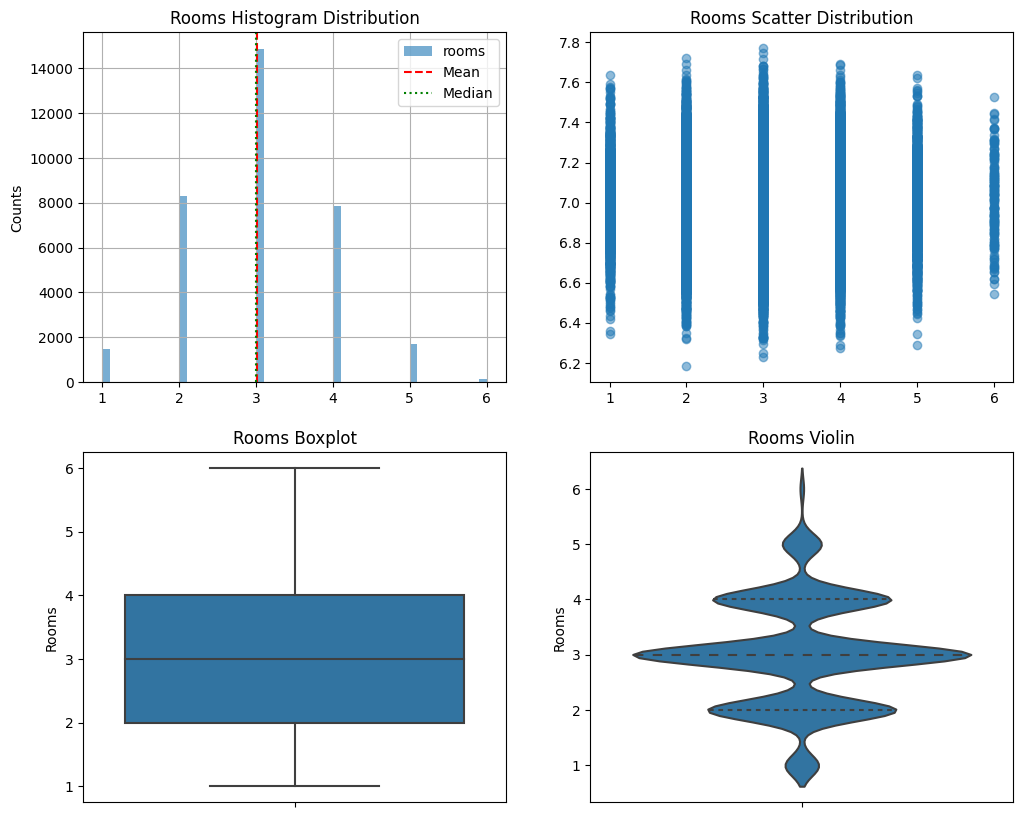

In [33]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
df['Rooms'].hist(bins=50, label='rooms', alpha=0.6)
plt.axvline(np.mean(df['Rooms']), ls='--', c='r', label="Mean")
plt.axvline(np.median(df['Rooms']), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("Rooms Histogram Distribution");
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(df['Rooms'], np.random.normal(7, 0.2, size=df.shape[0]), alpha=0.5)
plt.title("Rooms Scatter Distribution");

plt.subplot(2, 2, 3)
sns.boxplot(y="Rooms", data=df)
plt.title("Rooms Boxplot");

plt.subplot(2, 2, 4)
sns.violinplot(y="Rooms", data=df, inner="quartile", bw=0.2)
plt.title("Rooms Violin");

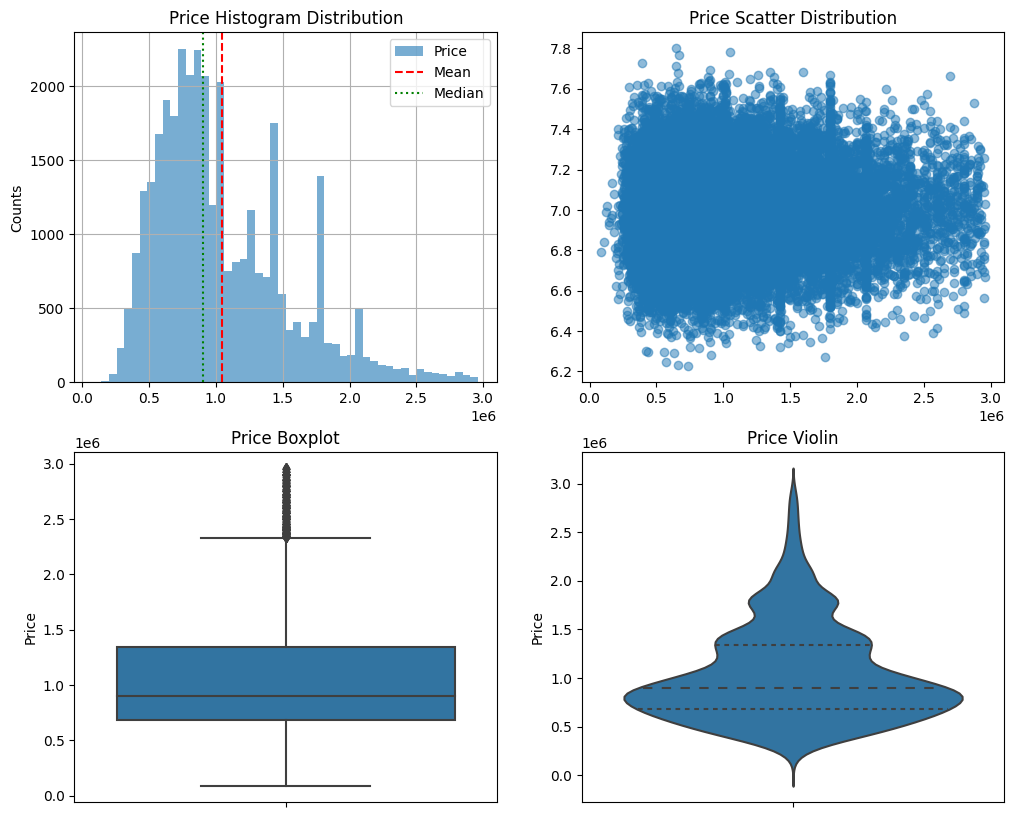

In [34]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
df['Price'].hist(bins=50, label='Price', alpha=0.6)
plt.axvline(np.mean(df['Price']), ls='--', c='r', label="Mean")
plt.axvline(np.median(df['Price']), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("Price Histogram Distribution");
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(df['Price'], np.random.normal(7, 0.2, size=df.shape[0]), alpha=0.5)
plt.title("Price Scatter Distribution");

plt.subplot(2, 2, 3)
sns.boxplot(y="Price", data=df)
plt.title("Price Boxplot");

plt.subplot(2, 2, 4)
sns.violinplot(y="Price", data=df, inner="quartile", bw=0.2)
plt.title("Price Violin");

In [35]:
X = df.drop(["Price","Suburb","Method","SellerG","CouncilArea","Regionname","Type"], axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data using the scaler to make the data between 0 and 1
scaled_training_df = scaler.fit_transform(X_train)

# Transform the test data, we use 'transform' method for scaling paramaters learned on the train data.
scaled_test_df=scaler.transform(X_test)

In [37]:
def select_best_model(models, X, y, cv=10, scoring='neg_mean_squared_error'):
    """
    Selects the best model among a list of models using cross-validation and returns a DataFrame with model names and scores.

    Parameters:
    - models (dict): A dictionary of model names as keys and model objects as values.
    - X (array-like): The feature matrix.
    - y (array-like): The target variable.
    - cv (int, optional): Number of cross-validation folds (default is 5).
    - scoring (str, optional): Scoring metric for cross-validation (default is 'neg_mean_squared_error').

    Returns:
    - results_df (DataFrame): A DataFrame with two columns - 'Model' and 'RMSE Score'.
    """
    model_names = []
    rmse_scores = []

    for model_name, model in models.items():
        # Perform cross-validation
        cv_scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
        rmse_score = np.mean(np.sqrt(np.abs(cv_scores)))

        # Append the model name and its scores to the lists
        model_names.append(model_name)
        rmse_scores.append(rmse_score)

    # Create a DataFrame from the lists
    results_df = pd.DataFrame({'Model': model_names, 'RMSE Score': rmse_scores})

    return results_df

In [38]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet': ElasticNet(),
    'SVR': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
}

# Call the function to select the best model and get the results DataFrame
results_df = select_best_model(models, X_train, y_train)

print("Model Comparison Results:")
print(results_df)

Model Comparison Results:
                       Model     RMSE Score
0          Linear Regression  357015.049558
1           Ridge Regression  357015.036090
2           Lasso Regression  357015.049612
3                 ElasticNet  368675.886836
4                        SVR  517068.301985
5              Decision Tree  339305.522099
6              Random Forest  266873.449827
7        KNeighborsRegressor  338093.180308
8  GradientBoostingRegressor  259536.959007
9          AdaBoostRegressor  385745.843060


In [42]:
# Grid Search CV
gb_reg = GradientBoostingRegressor()

# Define the hyperparameters and their possible values to search over
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50, 60, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'subsample': [0.5, 0.7, 1.0]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gb_reg, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5)

# Perform the grid search on your data
grid_search.fit(X, y)

# Print the best hyperparameters and corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best RMSE Score:", np.sqrt(-grid_search.best_score_))

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best RMSE Score: 250580.25356243746


In [43]:
selected_model = GradientBoostingRegressor(n_estimators=200, max_depth=5,
                                           learning_rate=0.1, subsample=1)
final_model = selected_model.fit(X_train,y_train)
final_model_pred = final_model.predict(X_test)
print(math.sqrt(mean_squared_error(y_test, final_model_pred)))

245244.75908978833


In [44]:
print("Final Model Mean Squared Error", mean_squared_error(y_test, final_model_pred))
print("Final Model Root Mean Squared Error", math.sqrt(mean_squared_error(y_test, final_model_pred)))
print("Final Model Mean Absolute Error", mean_absolute_error(y_test, final_model_pred))
print("Final Model R2 Score", r2_score(y_test, final_model_pred))

Final Model Mean Squared Error 60144991861.00832
Final Model Root Mean Squared Error 245244.75908978833
Final Model Mean Absolute Error 171084.3630030538
Final Model R2 Score 0.7598752598987556
